In [2]:
import copy
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn import datasets, preprocessing
import pandas as pd
from pymanopt.solvers import TrustRegions
from manopt_dr.core import gen_ldr
from manopt_dr.predefined_func_generator import *

In [3]:
# Generate data

"""
Number of Instances: 214
Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps

"""

X = pd.read_csv("glass.data", header = None,usecols=[ 1,2,3,4,5,6,7,8,9],delim_whitespace=False)
y = pd.read_csv("glass.data", header = None,usecols=[ 10],delim_whitespace=False)


n_samples, n_features = X.shape
X = X.values.tolist()
y = y.values.tolist()
"""
print(n_samples)
print(n_features)
print(X)
print(y)
"""
mapped = []
for j in y:
    mapped.append(j[0])
y = mapped
"""
print(X)
print(y)
d = dict([(b,a) for a,b in enumerate(sorted(set(y)))])
y = [d[i] for i in y]
"""
n_components = 2
X = preprocessing.scale(X)


In [4]:
"""
# ccPCA
X_tg = X[y == 2, :]
X_bg = X[y != 2, :]
CCPCA = gen_ldr(gen_cost_ccpca, gen_default_proj)
ccpca = CCPCA(n_components=n_components).fit(X_tg, X_bg)
Z = ccpca.transform(X)
cost = ccpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'ccPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'
)
plt.show()
"""

"\n# ccPCA\nX_tg = X[y == 2, :]\nX_bg = X[y != 2, :]\nCCPCA = gen_ldr(gen_cost_ccpca, gen_default_proj)\nccpca = CCPCA(n_components=n_components).fit(X_tg, X_bg)\nZ = ccpca.transform(X)\ncost = ccpca.get_final_cost()\ncontrastiveness = 1 / cost\n\n# Plot\nplt.figure(figsize=(6, 6))\nplt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)\nplt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)\nplt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)\nplt.legend(loc='best', shadow=False, scatterpoints=1)\nplt.title(\n    f'ccPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'\n)\nplt.show()\n"

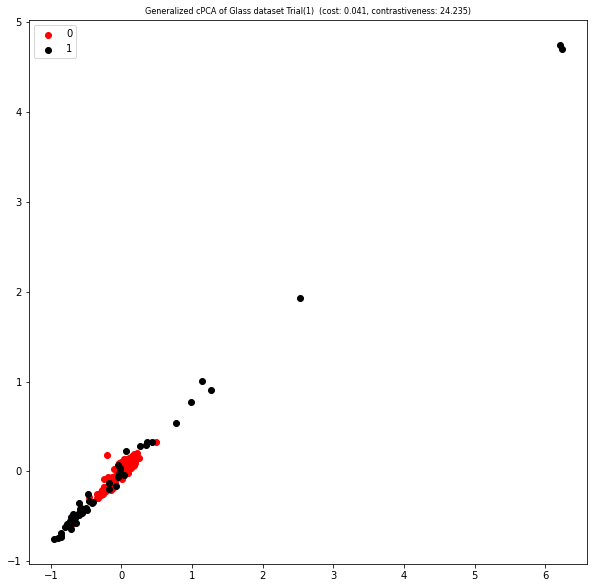

In [5]:
# generalized cPCA
GCPCA = gen_ldr(gen_cost_gcpca, gen_default_proj)

# Trial 1: 
"""
    Group 1: [1,2,3,4] Group 2: [5,6,7]    
"""

g1 = [1,2,3,4]
g2 = [5,6,7]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
#print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)
#plt.xlim(-4, 2)
#plt.ylim(-5, 20)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Glass dataset Trial(1)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()


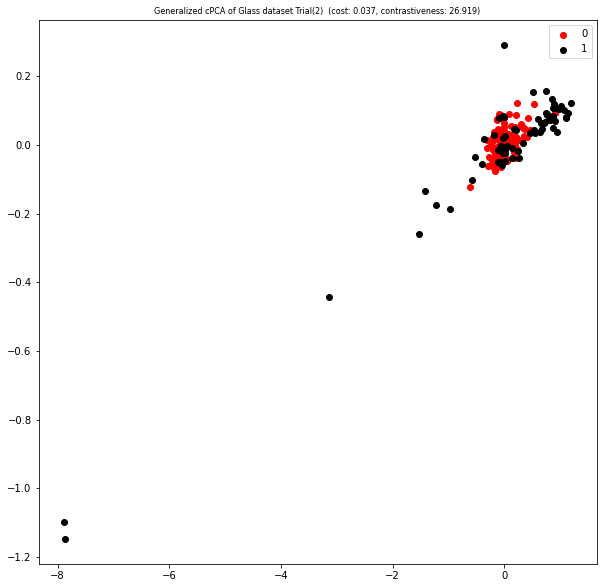

In [6]:
# Trial 2: 
"""
    Group 1: [1,2,4] Group 2: [3,5,6,7]    
"""
g1 = [1,2,4]
g2 = [3,5,6,7]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
#print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)
#plt.xlim(-4,2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Glass dataset Trial(2)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()


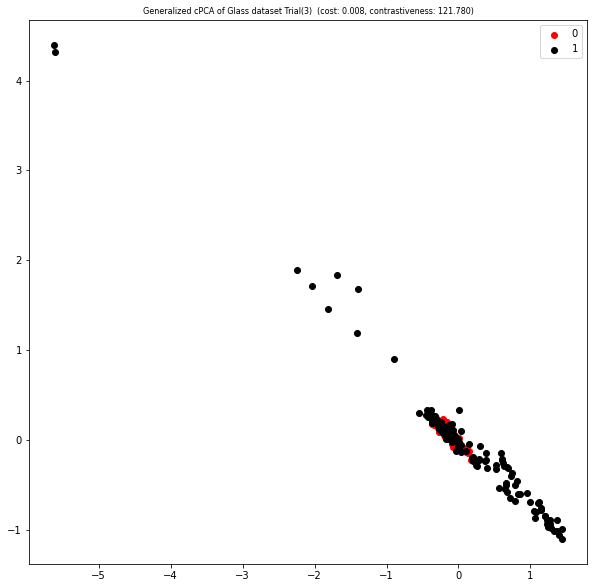

In [7]:
# Trial 3: 
"""
    Group 1: [1,4] Group 2: [2,3,5,6,7]    
"""
g1 = [1,4]
g2 = [2,3,5,6,7]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
#print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Glass dataset Trial(3)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()



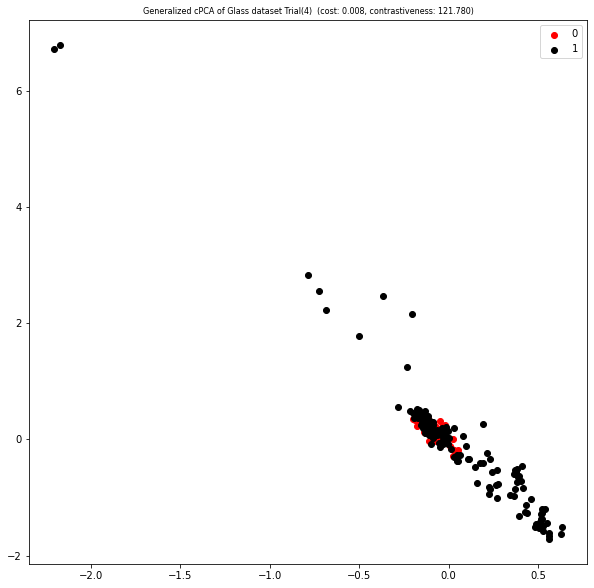

In [8]:
# Trial 4: 
"""
    Group 1: [1] Group 2: [2,3,4,5,6,7]    
"""
g1 = [1]
g2 = [2,3,4,5,6,7]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
#print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Glass dataset Trial(4)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()


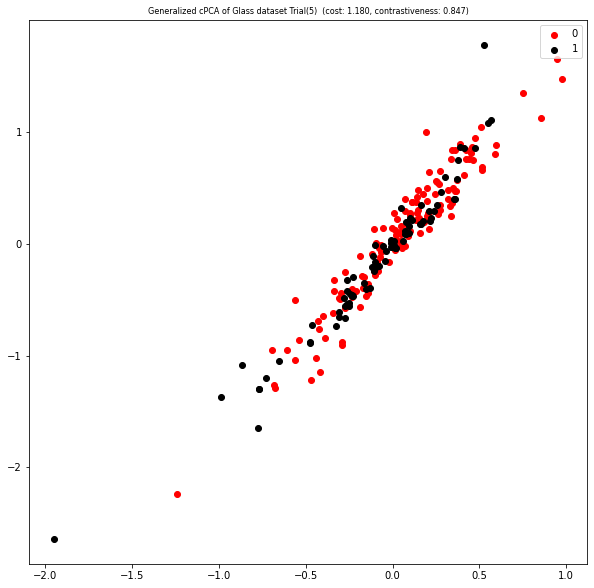

In [9]:
# Trial 5: 
"""
    Group 1: [2,3,4,5,7] Group 2: [1,6]    
"""
g1 = [2,3,4,5,7]
g2 = [1,6]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
#print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Glass dataset Trial(5)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()


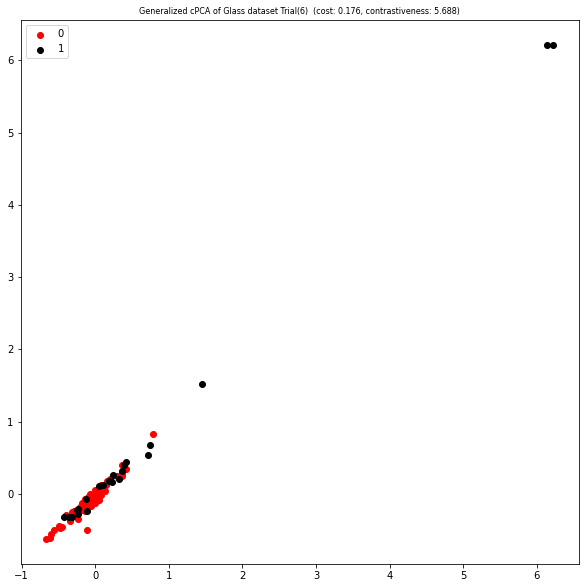

In [10]:
# Trial 6: 
"""
    Group 1: [2,3,4] Group 2: [5,6]    
"""
g1 = [2,3,4]
g2 = [5,6]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
#print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Glass dataset Trial(6)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()

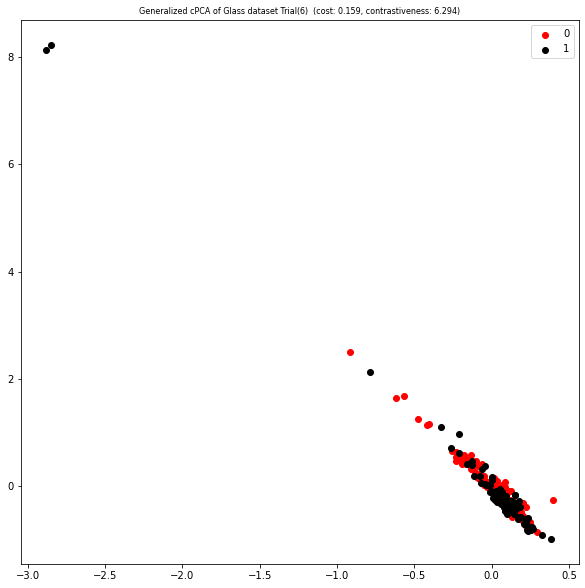

In [11]:
# Trial 6: 
"""
    Group 1: [2,3,4,7] Group 2: [1,5,6]    
"""
g1 = [2,3,4,7]
g2 = [1,5,6]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
#print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Glass dataset Trial(6)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()